#Importing libraries

**Definition** - Imorting Pandas, Numpy, Matplotlib, Seaborn, Glob and OS, for accessing, assesing, cleaning, Engineering, Analysing and Visualising Given Data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os
from datetime import datetime, date
%matplotlib inline

# Gathering Data

**Definition** - Reading file from cloud stored csv file using file drive path . 
**Function Used** : pandas.read_csv()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Utkarsh doc/201902-fordgobike-tripdata.csv')

#Assessing Data

**Definition** - Assessing given Raw database using functions such as: 
  * dataframe.head()
  * dataframe.tail()
  * dataframe.shape - It is an attribute not a function.
  * dataframe.info()
  * dataframe.dtypes - It is an attribute not a function.
  * dataframe.describe() - It is an attribute not a function.

In [ ]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [ ]:
df.shape

(183412, 16)

In [ ]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [ ]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


**What is the structure of your dataset?**

The dataset includes 183,412 trips 'rows' with 16 features 'columns'. Out of 16 features, seven are float64, two are int64, and seven objects. Also, start and end time have the wrong datatype( string instead of date-time object).

**What is/are the main feature(s) of interest in your dataset?**

According to me, the main features are the duration of the trip, origination and conclusion of trips, the user-type and most used stations.



**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

  * duration_sec
  * start_time
  * end_time
  * user_type
  * start_station_name
  * end_station_name




#Cleaning Data

###**1.Definition** - Making a copy of provided dataframe to retain original values for future comparision.

###**Code**

In [ ]:
df_copy = df.copy()

###**2. Definition** - Start and End times of trips are given in String format and thus need to be changed into Date-time object as it would further facilitate the calsulations and visualisation process.

###**Code**

In [ ]:
#changing datatype of 'start_time' & 'end_time' into datetime object
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

###**testing acquired Changes**

In [ ]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

###**3.Definition** - Ahead, Checking for data redundancy and duplicacy in particular.



###**Code**

In [ ]:
#check if any rows are duplicated
sum(df.duplicated())

0

### **Test Result** - 

No Duplicacy Found

###**4.Definition** - Extracting Hours and minutes from Date-Time object("start_time" and "end_time") into new added respectible columns for further extraction of data into subpart for reducing complexity and better visualization.

###**Code**

In [ ]:
#extract the hours from start time 
df['start_time_hours']=df['start_time'].dt.hour
#extract the minute from start time 
df['start_time_minutes']=df['start_time'].dt.minute + df['start_time_hours']*60

In [ ]:
#extract the hours from end time 
df['end_time_hours']=df['end_time'].dt.hour
#extract the minute from end time 
df['end_time_minutes']=df['end_time'].dt.minute + df['start_time_hours']*60

###**Testing above made changes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

###**5.Definition** - Finally Extracting Month Number from given timestamps. 
(We do not need to extract Year as this data in collected from 2019 only.)

###**Code**

In [ ]:
df['month']=df.start_time.dt.month

###**Testing above made changes**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

###**6.Definition** - 
  * Dropping irrelevant columns from our Data Base.
  * Dropping Rows with Null values for removing all NAN values from our database.


###**Code**

In [ ]:
#dropping irrelevant columns
df.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude'] ,axis =1 , inplace = True)

In [ ]:
df=df.dropna()

###**Testing above made alteration.**

In [ ]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_time_hours           0
start_time_minutes         0
end_time_hours             0
end_time_minutes           0
month                      0
dtype: int64

#Storing Data

###**Saving Engineered Database in a csv file**

In [ ]:
df.to_csv("fordbike_engineered.csv")

#Analyzing Data

##**Univariate Exploration**

### Analyse the ratio of User Type : Customer/Subscriber

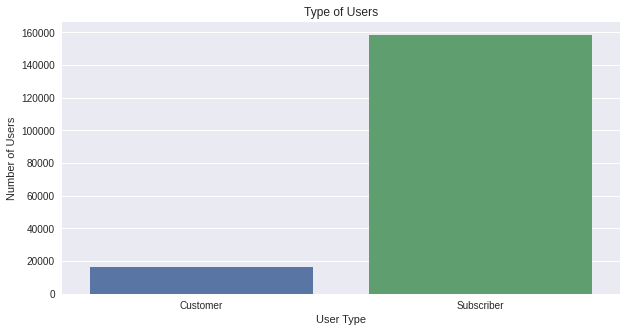

In [79]:
#BoxPlot representing User Type : Customer/Subscriber
plt.figure(figsize = (10, 5))
sb.countplot(data=df,x='user_type')
plt.title("Type of Users")
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()


Above chart suggests that majority of users are Subscribers while, a lesser number of usrs fall under 'Customer' category

### Which Age group comprises most of our User Database?


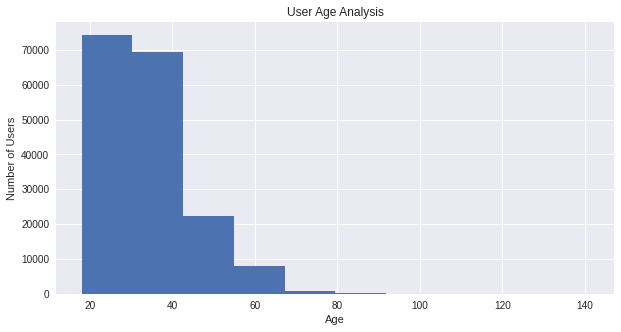

In [ ]:
#Histogram Plot depicting member's spread on the basis of their Age 
df['Age'] =  2019- df['member_birth_year'] 
plt.figure(figsize=(10,5))
plt.hist(data=df,x='Age')
plt.title('User Age Analysis')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

Above histogram clearly shows, 
  * People of age '18' to '25', comprise most of our Users.
  * We see clear fall in user count as their Age progress.

###Function to plot Univariate Barplots with specified X-Label.

In [96]:
#Function to plot Univariate Barplots with specified X-Label.
def funcbarplot(df, x):
  mg=df.groupby(x).size()
  plt.figure(figsize = (10, 5))
  sb.barplot(x = mg.index, y = mg.values)
  plt.title(f"{x} Ratio")
  plt.xlabel(f'{x} Type')
  plt.ylabel('Number of Members')
  plt.show()

### Which Gender type comprises most of our Users?

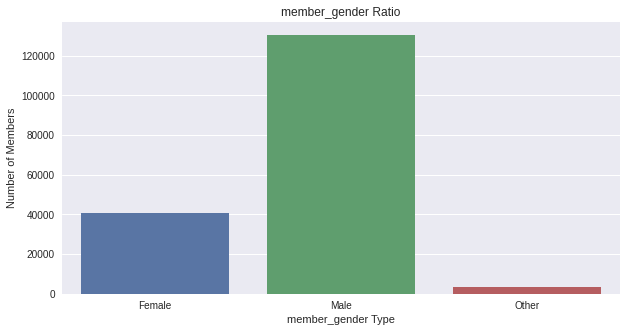

In [97]:
#BarPlot representing member gender ratio
funcbarplot(df,'member_gender')

Above BarPlot shows,
  * "Male" users dominate in number, with a total of 135000(approx) Users.
  * "Female" users fall 2nd in count ratio, with a total number close to 40000.
  * Users of "Other" gender type are least in number. Their total number lies close to 3000 users.

### Do users preffer to share their ride with other users?


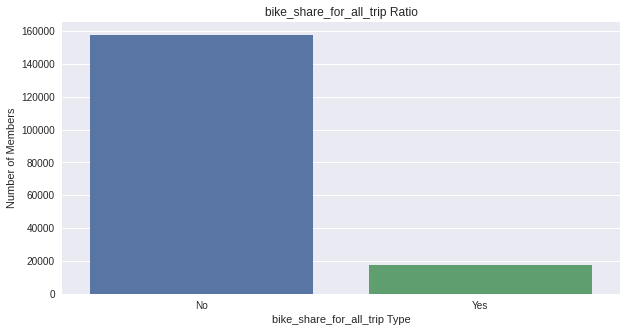

In [58]:
#BarPlot representing member gender ratio
funcbarplot(df,'bike_share_for_all_trip')

No, We can clearly see, majority of our users do not preffer sharing their rides with other users.

### Function to plot barchart of Station on basis of trips onboarded and deboarded. 

In [71]:
def funcbarh(df,x):
  df[x].value_counts()[:12].plot(kind='barh')
  plt.title(f'Most Used {x}')
  plt.show()

### A Barchart for depicting journey origination frquency of all stations.

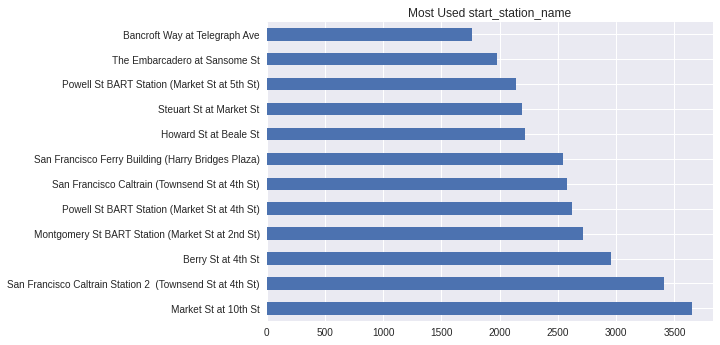

In [74]:
#A Barchart for depicting journey origination frquency of all stations. 
funcbarh(df,'start_station_name')

Market st at 10th station is the most used as trip origination station.

### A Barchart for depicting journey conclusion frquency of all stations. 


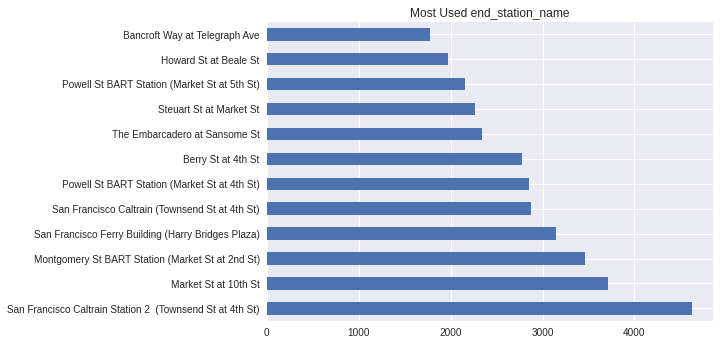

In [75]:
#A Barchart for depicting journey conclusion frquency of all stations. 
funcbarh(df,'end_station_name')

San Francisco Caltrain Station 2 is most used as trip conclusion station.

###Histogram plot for plotting Frequency Vs time duration in seconds

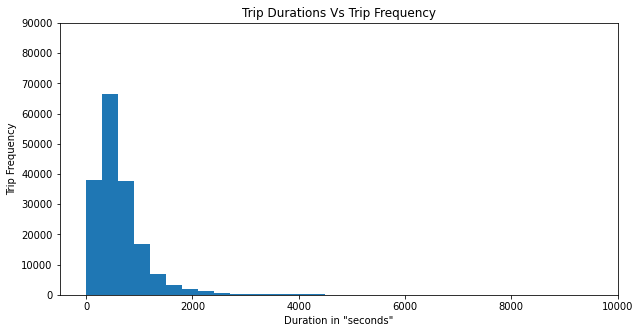

In [ ]:
#Histogram plot for plotting Frequency Vs time duration in seconds
plt.figure(figsize=(10,5))
duration_bins = np.arange(1,df.duration_sec.max()+300,300)
plt.hist(data=df,x='duration_sec',bins=duration_bins)
plt.title('Trip Durations Vs Trip Frequency')
plt.xlabel('Duration in "seconds"')
plt.ylabel('Trip Frequency')
plt.axis([-500, 10000, 0, 90000])
plt.show()

###Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The graph shows the most common trip durationz take 0-2000 seconds. The number of subscribers are significantly higher than customers in User-types. also, Market st at 10th street is the most used as trip origination station.
And, San Francisco Caltrain Station 2 is most used as trip conclusion station.

###Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

**YES!** There were some data redundancy and distribution issues in the used dataset and needed some cleaning. The problems adressed are as follows:

  * Start and End times of trips are given in String format and thus need to be changed into Date-time object as it would further facilitate the calsulations and visualisation process.
  * Extracting Hours and minutes from Date-Time object("start_time" and "end_time") into new added respectible columns for further extraction of data into subpart for reducing complexity and better visualization.
  * Extracting Month Number from given timestamps.
(We do not need to extract Year as this data in collected from 2019 only.)
  * Dropping irrelevant columns from our Data Base.
  * Dropping Rows with Null values for removing all NAN values from our database.

##Bivariate Exploration

### Discuss trip sharing tendency of Users of different gender types.

In [122]:
#Function to plot Bike Sharing Tendency of users
def funcMemberG(df,x):
  df['Memberg'] = df['member_gender'].mask(df['member_gender'].ne(x))
  df.groupby(['bike_share_for_all_trip'])['Memberg'].count().plot.bar()

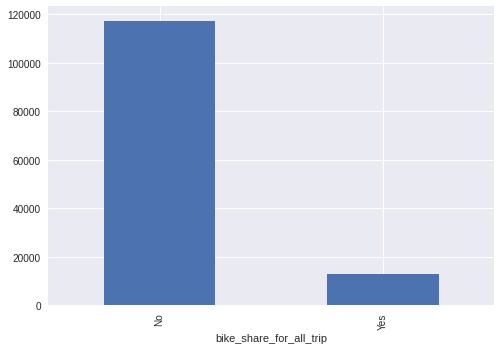

In [123]:
#Function to Plot Bike Sharing Tendency of MALE users
funcMemberG(df,"Male")

We can clearly infer, 
  * Users with "Male" gender type are dominant in number.
  * Their total number is close to 120000 users.
  * Approximately 17500 Users of "Male" gender preffer to share their ride.
  * Above given point indicates that such users have medium tendancy of all three genders to share their ride. Since approximately 1/6th of them share their ride.

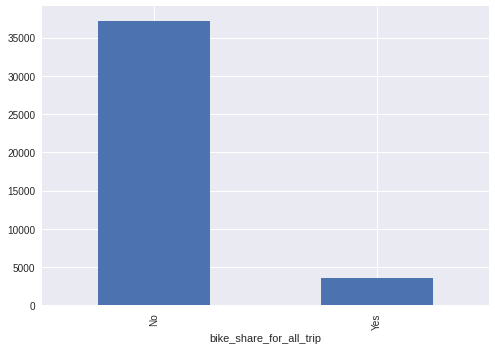

In [124]:
#Function to Plot Bike Sharing Tendency of FEMALE users
funcMemberG(df,"Female")

We can clearly infer, 
  * Users with "Female" gender type are less in number than "Male" users.
  * Their total number is close to 37500 users.
  * Approximately 4000 Users of "Female" gender preffer to share their ride.
  * Above given point indicates that such users have least tendancy to share their ride. Since approximately only 1/9th of them share their ride.

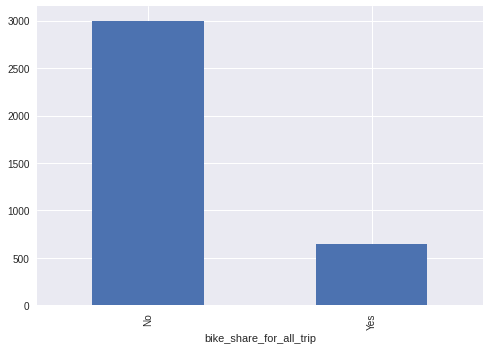

In [125]:
#Function to Plot Bike Sharing Tendency of OTHER users
funcMemberG(df,"Other")

We can clearly infer, 
  * Users with "Other" gender type are least in number.
  * Their total number is close to 3000 users.
  * Approximately 600 Users of "Other" gender preffer to share their ride.
  * Above given point indicates that such users have maximum tendancy to share their ride. Since approximately 1/5th of them share their ride.

### Discuss trip duration tendency of Users of different gender types.

In [91]:
#Function to Plot Trip Duration Mean for Each Gender
def funcplot(df, x):
  plt.figure(figsize = (10, 5))
  df.groupby(['member_gender'])[x].mean().plot.bar()
  plt.title(f'{x} VS Member Gender Bar Graph')
  plt.xlabel('Member Gender')
  plt.ylabel(f'{x}')
  plt.show()

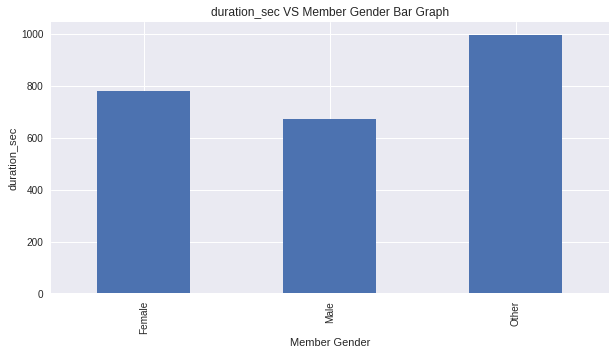

In [92]:
funcplot(df,'duration_sec')

We can clearly infer,
  * Users of "Other" gender type tend to have longer trip duration.
  * Female users travel more than Male users.
  * Men tend to have travel for least duration. (We are all the same and lazy !)

### Discuss trip duration tendency of Users of different User types.

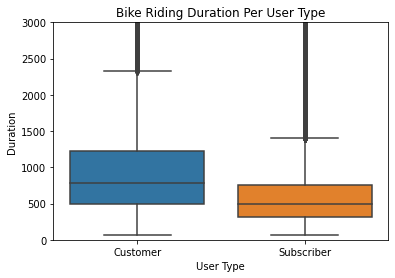

In [ ]:
# Boxplot showing trip duration per user type, ie; Customer/Subscriber
sb.boxplot(data=df, x='user_type', y='duration_sec')
plt.ylim(0,3000)
plt.title("Bike Riding Duration Per User Type")
plt.xlabel('User Type')
plt.ylabel('Duration')
plt.show()

We can infer here,
  * Customers tend to travel for longer durations.
  * Subscribers travel for comparatively less duration. 

### Discuss trip duration tendency of Users from top 3 most Onboarded stations.

Text(0, 0.5, 'Duration "seconds"')

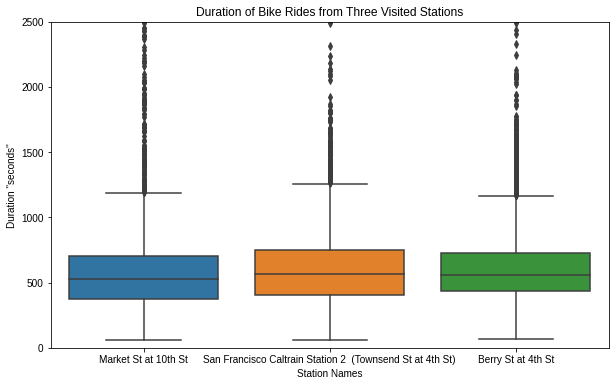

In [ ]:
#boxplot for trip duration analysis of journeys from top three most used stations.
start=df['start_station_name'].value_counts().index[:3]
s_stations = df.loc[df['start_station_name'].isin(start)]

plt.figure(figsize=(10,6))
sb.boxplot(data = s_stations, x='start_station_name', y='duration_sec')
plt.ylim(0, 2500)
plt.style.use('seaborn')
plt.title('Duration of Bike Rides from Three Onboarded Stations')
plt.xlabel('Station Names')
plt.ylabel('Duration "seconds"')

We can infer that,
  * All stations share close to common trip durations.
  * Trips started from Station 'San Francisco Caltrain Station 2', tend to have longest duration of the three.

### Discuss traffic tendency of Users over 24hr period.

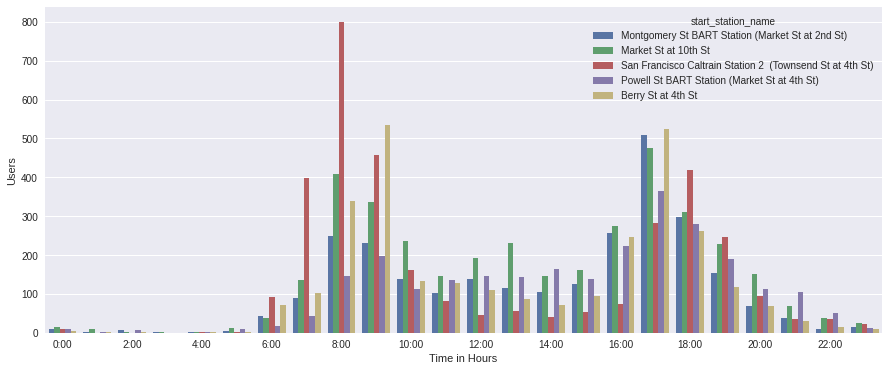

In [ ]:
start=df['start_station_name'].value_counts().index[:5]
s_stations = df.loc[df['start_station_name'].isin(start)]
plt.figure(figsize = (15,6))
sb.countplot(data=s_stations, x='start_time_hours', hue='start_station_name')
x_tick= np.arange(0,24,2)
x_label= [str(x)+":00" for x in x_tick]
plt.xticks(x_tick, x_label)
plt.xlabel('Time in Hours')
plt.ylabel('Users')
plt.show()

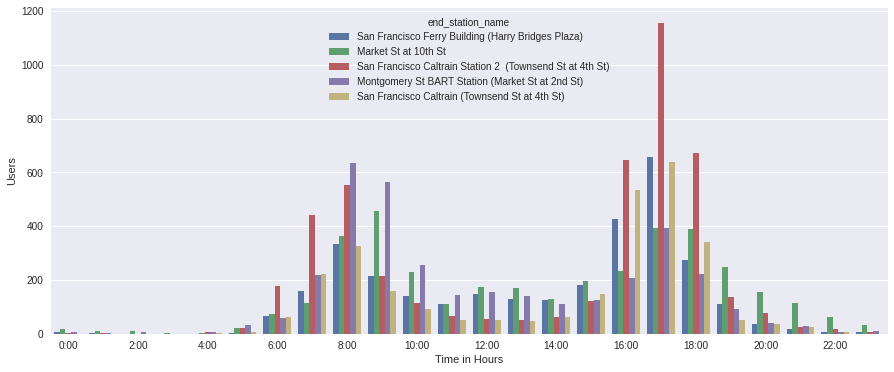

In [ ]:
end= df['end_station_name'].value_counts().index[:5]
e_stations = df.loc[df['end_station_name'].isin(end)]
plt.figure(figsize = (15,6))
sb.countplot(data=e_stations, x='end_time_hours', hue='end_station_name')
x_tick= np.arange(0,24,2)
x_label= [str(x)+":00" for x in x_tick]
plt.xticks(x_tick, x_label)
plt.xlabel('Time in Hours')
plt.ylabel('Users')
plt.show()

Graphs suggest, bigger number of users prefer ride bike in the morning at 8. On the other hand, the users end the trip usually at 5 pm.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

First, the duration per type of user shows that the customers average duration is higher than the subscribers. While as seen in the univariate plot the subscribers bike ride count is higher than the customers bike ride count. Also, the start station and end station does not much determine the duration. It suggests that some starting stations are having higher visited as the starting point and some end stations are having higher visited as the ending point.

### Were there any interesting or surprising interactions between features?

Graphs suggest, bigger number of users prefer ride bike in the morning at 8. On the other hand, the users end the trip usually at 5 pm.

##**Multivariate Exploration**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


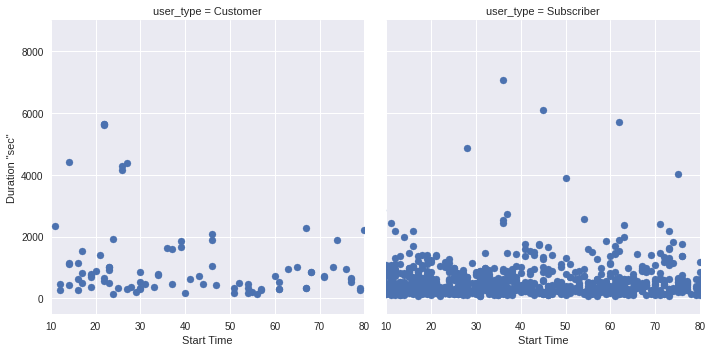

In [ ]:
# Scatterplot depicting time duration trends for both user types.
ut=sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
ut.map(plt.scatter, 'start_time_minutes', 'duration_sec')
ut.set_xlabels('Start Time')
ut.set_ylabels('Duration "sec"')
plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The graph shows the subscribers generally ride for a shorter time than customers who ride for a longer time during the period from 8 am.
**We can clearly see few outlier values in both cases.**